In [1]:
%matplotlib inline

In [50]:
import xlrd
import os 
import sqlite3
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import norm

sns.set(style="whitegrid")

In [51]:
db_path = '../datawarehouse.db'

### Target Variable: Price of AirBnB Listing

In [8]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, CAST(REPLACE(price, '$', '') AS FLOAT) as avg_price
FROM listings;
'''

cur.execute(query)
con.commit()

price_arr = cur.fetchall()

con.close()

In [9]:
cost_arr = []
for pairs in price_arr:
    cost_arr.append(pairs[1])

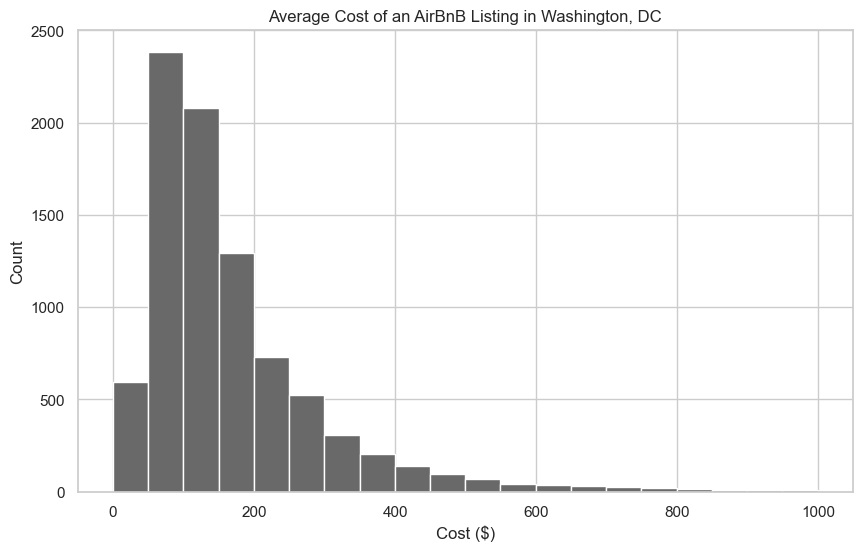

In [ ]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist(cost_arr, color="dimgray", bins=20)
axes.set_ylabel( "Count")
axes.set_xlabel( "Cost ($)")
axes.set_title( "Average Cost of an AirBnB Listing in Washington, DC")

plt.show()
plt.close()

Variables to explore:
- bedrooms
- beds
- accommodates

### Bedrooms variable

In [32]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, CAST(bedrooms AS INT), CAST(beds AS INT), CAST(accommodates AS INT), CAST(REPLACE(price, '$', '') AS FLOAT)
FROM listings;'''

cur.execute(query)
con.commit()

b_arr = cur.fetchall()

In [33]:
b_arr[0]

(22229408, 1, 1, 2, 20.0)

The SQL query returns a list of tuple objects, with:
- `b_arr[0]`: listing_id
- `b_arr[1]`: bedrooms
- `b_arr[2]`: beds
- `b_arr[3]`: accommodates
- `b_arr[4]`: price

In [34]:
listing_id = []
bedrooms = []
beds = []
accommodates = []
price = []
for b in b_arr:
    listing_id.append(b[0])
    bedrooms.append(b[1])
    beds.append(b[2])
    accommodates.append(b[3])
    price.append(b[4])
    
b_df = pd.DataFrame({'listing_id': listing_id,
                    'bedrooms': bedrooms,
                    'beds': beds,
                    'accommodates': accommodates,
                    'price': price})

b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing_id    8628 non-null   int64  
 1   bedrooms      8628 non-null   int64  
 2   beds          8628 non-null   int64  
 3   accommodates  8628 non-null   int64  
 4   price         8628 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 337.2 KB


The variables `beds`, `bedrooms`, and `accommodates` are all integer values. The `price` variable is a float value. 

In [53]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

### Bedrooms
The bedrooms variable is a numerical integer value. The `beds` variable represents the number of beds in the AirBnb. More beds generally corresponds to a higher capacity for overnight guests.

In [38]:
b_df.bedrooms.describe()

count    8628.000000
mean        1.516574
std         1.134750
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: bedrooms, dtype: float64

75% of AirBnB listings in the DC area contain two or fewer bedrooms. There is one AirBnB that has a maximum number of bedrooms of 15. 

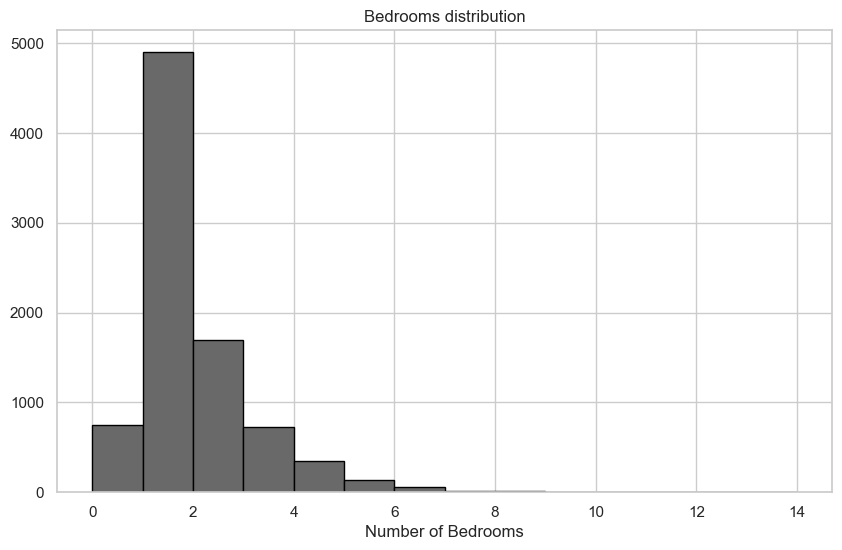

In [60]:
h=1
mn = int(b_df["bedrooms"].min())
mx = int(b_df["bedrooms"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(b_df["bedrooms"],bins=bins, histtype='bar', color="DimGray", ec='black')
axes.set_title("Bedrooms distribution")
axes.set_xlabel("Number of Bedrooms")

plt.show()
plt.close()

The distribution of the number of bedrooms appears to be right-skewed. This makes sense, as one or two bedrooms may be common for most homes, with 3 or more bedrooms being less commons in homes, especially in a densely-populated area.

### Beds
The bedrooms variable is a numerical integer value. The `beds` variable represents the number of beds in the AirBnb. More beds generally corresponds to a higher capacity for overnight guests.

In [61]:
b_df.beds.describe()

count    8628.000000
mean        1.930111
std         1.405451
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        20.000000
Name: beds, dtype: float64

75% of AirBnB listings in the DC area contain two or fewer beds. There is one AirBnB that has a maximum number of bedrooms of 20. 

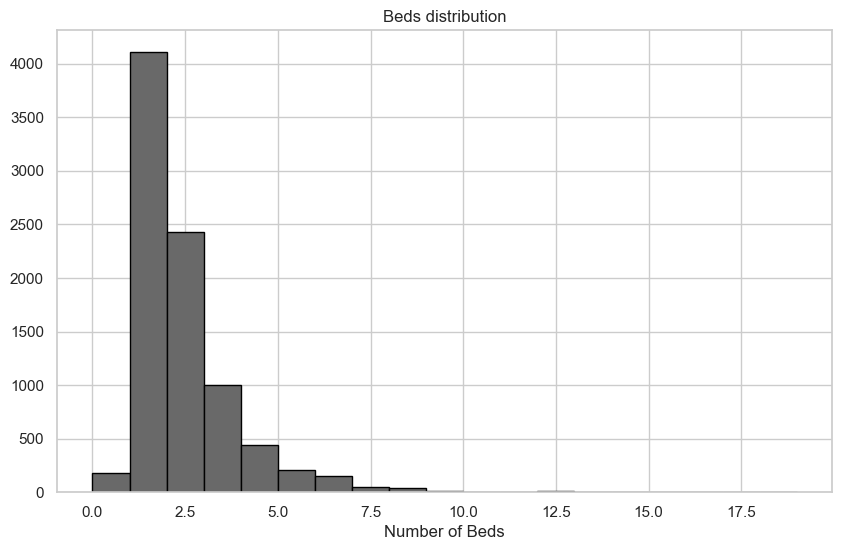

In [62]:
h=1
mn = int(b_df["beds"].min())
mx = int(b_df["beds"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(b_df["beds"],bins=bins, histtype='bar', color="DimGray", ec='black')
axes.set_title("Beds distribution")
axes.set_xlabel("Number of Beds")

plt.show()
plt.close()

The distribution of the number of bedrooms appears to be right-skewed, following a similar shape to the number of bedrooms in the AirBnBs. There are a few properties with no beds, but most of the properties have 1, 2, or 3 beds.

### Accommodates
The `accommodates` variable is a numerical integer value. The `accommodates` variable represents the number of beds in the AirBnb. More beds generally corresponds to a higher capacity for overnight guests.

In [64]:
b_df.accommodates.describe()

count    8628.000000
mean        3.632592
std         2.389346
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: accommodates, dtype: float64

75% of AirBnB listings in the DC area are capable of accomodating 4 people. This unsurprisingly folows a similar pattern to both the `beds` and `bedroom` variables.

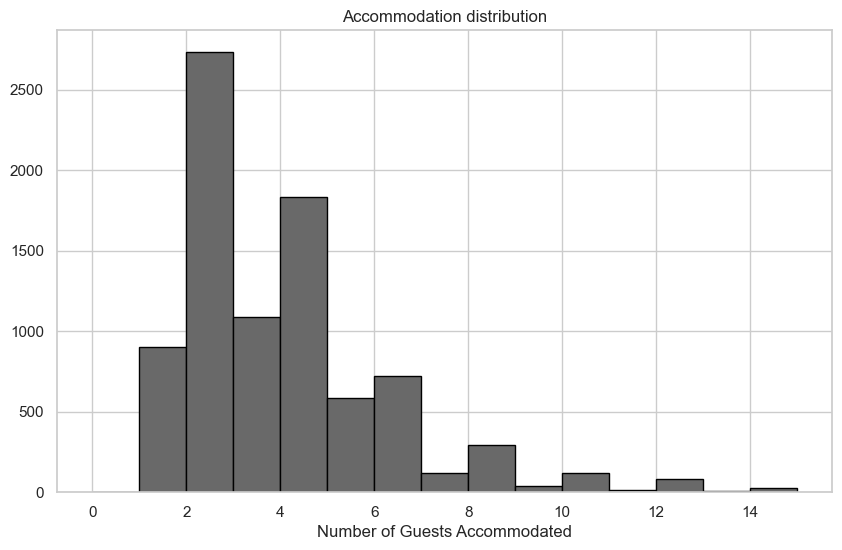

In [65]:
h=1
mn = int(b_df["accommodates"].min())
mx = int(b_df["accommodates"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(b_df["accommodates"],bins=bins, histtype='bar', color="DimGray", ec='black')
axes.set_title("Accommodation distribution")
axes.set_xlabel("Number of Guests Accommodated")

plt.show()
plt.close()

The data are once again right-skewed. Even number `accommodates` values are more common, which makes sense given that one bed is often counted as accommodating 2 guests.

# Pairwise Analysis

In [66]:
def classify_correlation(r):
    r = abs(r)
    if r < 0.16:
        return "very weak"
    if r < 0.29:
        return "weak"
    if r < 0.49:
        return "low"
    if r < 0.69:
        return "moderate"
    if r < 0.89:
        return "strong"
    return "very strong"

In [67]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    r = stats.pearsonr(data[x], data[y])[0]
    print( "r   =", r, f"({classify_correlation(r)})")
    rho = stats.spearmanr(data[x], data[y])[0]
    print( "rho =", rho, f"({classify_correlation(rho)})")

In [68]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [69]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):

    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")

    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOWESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)

    plt.show()
    plt.close()

/opt/anaconda3/envs/en685648/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


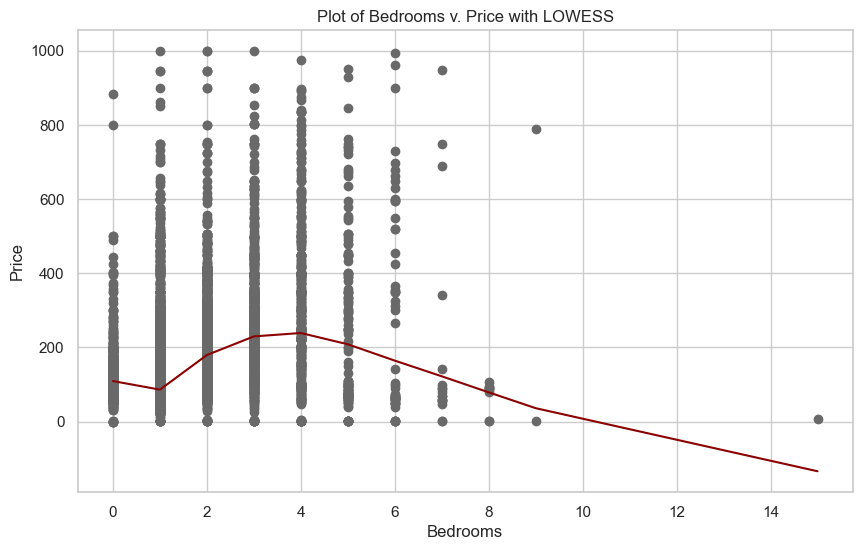

In [70]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(b_df["price"], b_df["bedrooms"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( b_df[ "bedrooms"], b_df["price"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Bedrooms v. Price with LOWESS")
axes.set_xlabel( "Bedrooms")
axes.set_ylabel( "Price")

plt.show()
plt.close()

In [52]:
correlation(b_df, 'bedrooms', 'price')

Correlation coefficients:
r   = 0.39195580522733553 (low)
rho = 0.41556405657148726 (low)


### Beds v. Price with LOWESS

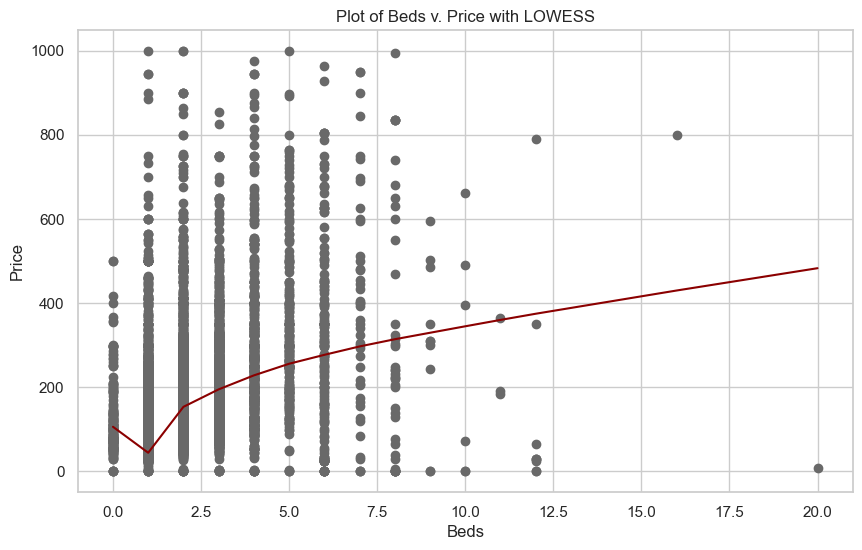

In [71]:
lowess = sm.nonparametric.lowess(b_df["price"], b_df["beds"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( b_df[ "beds"], b_df["price"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Beds v. Price with LOWESS")
axes.set_xlabel( "Beds")
axes.set_ylabel( "Price")

plt.show()
plt.close()

In [72]:
correlation(b_df, 'beds', 'price')

Correlation coefficients:
r   = 0.4218706196242424 (low)
rho = 0.45671345442335864 (low)


### Accommodates v. Price with LOWESS

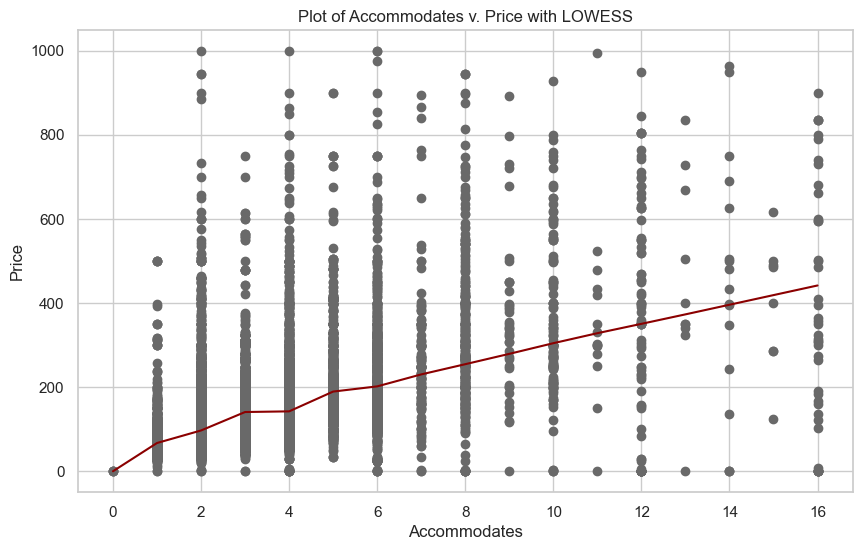

In [73]:
lowess = sm.nonparametric.lowess(b_df["price"], b_df["accommodates"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( b_df[ "accommodates"], b_df["price"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Accommodates v. Price with LOWESS")
axes.set_xlabel( "Accommodates")
axes.set_ylabel( "Price")

plt.show()
plt.close()

In [72]:
correlation(b_df, 'beds', 'price')

Correlation coefficients:
r   = 0.4218706196242424 (low)
rho = 0.45671345442335864 (low)


# Backup

### Neighborhood groups

The neighborhood group variable is a categorical value. In Washington D.C., there are [131 neighborhoods](https://en.wikipedia.org/wiki/Neighborhoods_in_Washington,_D.C.) that are unofficially defined. The AirBnB dataset compiles neighborhood names using the city's defined borders for the neighborhoods, along with the latitude and longitude of the property listing. 

In [11]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT neighbourhood_cleansed, COUNT(*) as neighborhood_count
FROM listings
GROUP BY neighbourhood_cleansed
ORDER BY neighborhood_count DESC;
'''

cur.execute(query)
con.commit()

neighborhood = cur.fetchall()

con.close()

# Convert to DataFrame so Pandas functions can be used for EDA
nbhd = []
n_count = []
for n in neighborhood:
    nbhd.append(n[0])
    n_count.append(n[1])
n_df = pd.DataFrame({'nbhd': nbhd,
                    'n_count': n_count})

In [12]:
from tabulate import tabulate

n_df.sort_values(by='n_count', ascending=False)
t = tabulate(n_df, 
             headers=('Index', 'Neighborhood Grouping', 'Count'),
            tablefmt='fancy_grid')
print('     Count of AirBnB Listings, By Neighborhood')
print(t)
print('\n')

     Count of AirBnB Listings, By Neighborhood
╒═════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════╤═════════╕
│   Index │ Neighborhood Grouping                                                                             │   Count │
╞═════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════╪═════════╡
│       0 │ Union Station, Stanton Park, Kingman Park                                                         │     808 │
├─────────┼───────────────────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│       1 │ Capitol Hill, Lincoln Park                                                                        │     675 │
├─────────┼───────────────────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│       2 │ Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                             

In this dataset, the neighborhoods are grouped based on proximity. There are 39 unique neighborhood groupings, reduced from the 131 individual neighborhoods in Washington, D.C. The neighborhood groupings with the greatest number of listings are: 
1. Capitol Hill, Union Park (561 listings)
2. Union Station, Stanton Park, Kingman Park (550 listings)
3. Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View (456 listings)

The Captiol Hill neighborhood is one of the most densely populated in Washington D.C$^{[1]}$. The Union Station neighborhood is near Washington Union Station, which is Amtrack's second-busiest station$^{[2]}$. The Columbia Heights and Mt. Pleasant areas are located close to a major University, and contains many restaurants$^{[3]}$.

*Sources*
1. https://en.wikipedia.org/wiki/Capitol_Hill
2. https://en.wikipedia.org/wiki/Washington_Union_Station
3. https://en.wikipedia.org/wiki/Columbia_Heights_(Washington,_D.C.)

### Neighborhood Groups - Tax Assessed Property Values Dataset

The secondary dataset on tax-assessed property values contains neighborhood names. The same neighborhood grouping were used in both the primary and secondary dataset. 

In [10]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT NBHDNAME, COUNT(*) as neighborhood_count
FROM property_info
WHERE PROPTYPE LIKE '%Residential%'
GROUP BY NBHDNAME
ORDER BY neighborhood_count DESC;
'''

cur.execute(query)
con.commit()

prop_info = cur.fetchall()

In [11]:
nbhd = []
count = []
for vals in prop_info:
    nbhd.append(vals[0])
    count.append(vals[1])
    
prop_df = pd.DataFrame({'nbhd': nbhd,
                       'count': count})

prop_df.sort_values(by='count', ascending=False)
t = tabulate(prop_df, 
             headers=('Index', 'Neighborhood Grouping', 'Count'),
            tablefmt='fancy_grid')
print('     Number of Properties In Neighborhoods')
print(t)
print('\n')

     Number of Properties In Neighborhoods
╒═════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════╤═════════╕
│   Index │ Neighborhood Grouping                                                                             │   Count │
╞═════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════╪═════════╡
│       0 │ Capitol Hill, Lincoln Park                                                                        │   21583 │
├─────────┼───────────────────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│       1 │ Dupont Circle, Connecticut Avenue/K Street                                                        │   20935 │
├─────────┼───────────────────────────────────────────────────────────────────────────────────────────────────┼─────────┤
│       2 │ Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                 

The three neighborhoods with the highest number of residential properties are:
1. Capitol Hill, Lincoln Park   
2. Dupont Circle, Connecticut Avenue/K Street
3. Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View  

The "Capitol Hill, Lincoln Park" and "Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View" neighborhood groupings fall in the top three, based on count of properties, for both datasets. In the property assessed dataset, the "Union Station, Staton Park, Kingman Park" grouping ranks 29th by property count, while in the AirBnB data, it ranked second by count. The "Dupont Circle, Connecticut Avenue/K Street" grouping has the fourth highest count of AirBnB listings, and ranks second, by count, in the property assessed values.

The property assessed values dataset also includes entire apartment buildings. It may be the case that Union Station contains more group living buildings, which would limit the overall count of individual properties in the secondary dataset, since an entire apartment building may only count as one property. 

### Number of bathrooms

The number of bathrooms in an AirBnB is a categorical value, since AirBnbs can have "shared" or "private" bathrooms. Additionally, there may be "half-baths" as well. 

In [12]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT bathrooms_text, COUNT(*) as num_bath
FROM listings
GROUP BY bathrooms_text
ORDER BY num_bath DESC;
'''

cur.execute(query)
con.commit()

bathroom = cur.fetchall()

con.close()

In [13]:
bath_type = []
bath_count = []
for vals in bathroom:
    bath_type.append(vals[0])
    bath_count.append(vals[1])
    
bath_df = pd.DataFrame({'bath_type': bath_type,
                       'count': bath_count})

In [14]:
bath_df.sort_values(by='count', ascending=False)
bath_df.set_index('bath_type', inplace=True)
t = tabulate(bath_df, 
             headers=('Bathroom Type', 'Count'),
            tablefmt='fancy_grid')
print('     Counts of Bathroom Types In AirBnb')
print(t)
print('\n')

     Counts of Bathroom Types In AirBnb
╒═══════════════════╤═════════╕
│ Bathroom Type     │   Count │
╞═══════════════════╪═════════╡
│ 1 bath            │    3595 │
├───────────────────┼─────────┤
│ 2 baths           │     652 │
├───────────────────┼─────────┤
│ 1 shared bath     │     490 │
├───────────────────┼─────────┤
│ 1 private bath    │     460 │
├───────────────────┼─────────┤
│ 1.5 baths         │     320 │
├───────────────────┼─────────┤
│ 2.5 baths         │     311 │
├───────────────────┼─────────┤
│ 3.5 baths         │     133 │
├───────────────────┼─────────┤
│ 3 baths           │     117 │
├───────────────────┼─────────┤
│ 1.5 shared baths  │     111 │
├───────────────────┼─────────┤
│ 2 shared baths    │     109 │
├───────────────────┼─────────┤
│ 4 baths           │      37 │
├───────────────────┼─────────┤
│ 2.5 shared baths  │      36 │
├───────────────────┼─────────┤
│ 4.5 baths         │      25 │
├───────────────────┼─────────┤
│ 3 shared baths    │      12 │


The most common bathroom type for Airbnb is "1 bath". Some listings don't have bath populated: these can be filled with the most common bathroom type, which is one bath. It may make sense to reduce the number of "types of bath" categories. This "bathroom_dict" variable can be used later in pairwise analysis.

In [15]:
'''
Limit the number of bath categories
'''
bathroom_dict = {}
bathroom_mapping = {}

def getNewBathroomCat(s):
    str_elements = s.split(' ')
    bath_cat = ''
    if str_elements[0] == '':
        bath_cat = '1 Private'
    elif str_elements[0] == 'Half-bath':
        bath_cat = '1 Private'
    elif str_elements[0] == '0':
        bath_cat = '1 Private'
    else:
        try:
            num_bath = float(str_elements[0])
            if num_bath >= 3:
                bath_cat = '3+'
            elif num_bath >= 2:
                bath_cat = '2'
            else:
                bath_cat = '1'
            if str_elements[1] == 'shared':
                bath_cat += ' Shared'
            else:
                bath_cat += ' Private'
        except:
            if str_elements[0] == 'Private':
                bath_cat = '1 Private'
            elif str_elements[0] == 'Shared':
                bath_cat = '1 Shared'
    return bath_cat
    
for ind in range(0, len(bath_type)):
    s = bath_type[ind]
    c = bath_count[ind]
    
    b_type = getNewBathroomCat(s)
    bathroom_mapping[s] = b_type

    if b_type not in bathroom_dict:
        bathroom_dict[b_type] = c
    else:
        bathroom_dict[b_type] +=c

In [16]:
lim_bath_df = pd.DataFrame({'bath_type': bathroom_dict.keys(), 'count': bathroom_dict.values()})

lim_bath_df.sort_values(by='count', ascending=False)
lim_bath_df.set_index('bath_type', inplace=True)
t = tabulate(lim_bath_df, 
             headers=('Bathroom Type', 'Count'),
            tablefmt='fancy_grid')
print('     Counts of Bathroom Types In AirBnb')
print(t)
print('\n')

     Counts of Bathroom Types In AirBnb
╒═════════════════╤═════════╕
│ Bathroom Type   │   Count │
╞═════════════════╪═════════╡
│ 1 Private       │    4392 │
├─────────────────┼─────────┤
│ 2 Private       │     963 │
├─────────────────┼─────────┤
│ 1 Shared        │     602 │
├─────────────────┼─────────┤
│ 3+ Private      │     326 │
├─────────────────┼─────────┤
│ 2 Shared        │     145 │
├─────────────────┼─────────┤
│ 3+ Shared       │      45 │
╘═════════════════╧═════════╛




### "Is Superhost" query

Some hosts on AirBnB are marked as Superhosts. This is a specific Airbnb program that "celebrates and rewards Airbnb's top-rated and most experienced hosts". These hosts must meet the following critera:
- 4.8+ overall rating
- 10+ stays
- <1% cancellation rate
- 90% response rate

This is a categorical, boolean value, with the host either being labeled as a superhost, or not being labeled as a superhost.

*Sources*
https://www.airbnb.com/d/superhost

In [17]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT host_is_superhost, COUNT(*) as num_superhosts
FROM listings
GROUP BY host_is_superhost
ORDER BY num_superhosts DESC;
'''

cur.execute(query)
con.commit()

superhost = cur.fetchall()

con.close()

In [18]:
s_status = []
count = []
for vals in superhost:
    s_status.append(vals[0])
    count.append(vals[1])
    
super_df = pd.DataFrame({'s_status': s_status,
                       'count': count})

super_df.set_index('s_status', inplace=True)
t = tabulate(super_df, 
             headers=('Is Superhost', 'Count'),
            tablefmt='fancy_grid')
print('     Number of Properties In Neighborhoods')
print(t)
print('\n')

     Number of Properties In Neighborhoods
╒════════════════╤═════════╕
│ Is Superhost   │   Count │
╞════════════════╪═════════╡
│ f              │    4496 │
├────────────────┼─────────┤
│ t              │    1972 │
├────────────────┼─────────┤
│                │       5 │
╘════════════════╧═════════╛




In the AirBnB listings, 4496 of the listings have hosts that are not superhosts. This is about 70% of all listings. The other 30%, or 1972 listings, are labeled as superhosts. Five of the points in the dataset are not labeled, and thuse should be treated as `is_superhost=False`.

### Listing Price vs. ________

Next, the target value's relationship will be compared to the other variables, which are:
1. Bathroom type (ordered categorical)
2. Neighborhood Group (categorical)
3. Superhost Status (categorical, boolean)
4. Tax-assessed property values (numerical)

### Listing Price vs. Bathroom Type

Comparing the AirBnb listing price means that a numerical value (price) will be compared to a categorical variable (bathroom type). 

In [19]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, CAST(REPLACE(price, '$', '') AS FLOAT), bathrooms_text FROM listings'''

cur.execute(query)
con.commit()

price_bathroom = cur.fetchall()

con.close()

In [24]:
listing_id = []
price = []
bath = []

for pb in price_bathroom:
    listing_id.append(pb[0])
    price.append(pb[1])
    bath.append(bathroom_mapping[pb[2]])
price_bath_df = pd.DataFrame({'listing_id': listing_id,
                             'price': price,
                             'bath': bath})


grouped_price_bath = price_bath_df.groupby('bath')
grouped_price_bath = grouped_price_bath['price'].describe()

t = tabulate(grouped_price_bath, 
             headers=('Bathroom Type', 'Count', 'Mean', 'Stdev', 'Min', '25%', '50%', '75%', 'Max'),
            tablefmt='fancy_grid')
print(t)
print('\n')

╒═════════════════╤═════════╤══════════╤══════════╤═══════╤═══════╤═══════╤════════╤═══════╕
│ Bathroom Type   │   Count │     Mean │    Stdev │   Min │   25% │   50% │    75% │   Max │
╞═════════════════╪═════════╪══════════╪══════════╪═══════╪═══════╪═══════╪════════╪═══════╡
│ 1 Private       │    4392 │ 142.102  │  88.8423 │     0 │    90 │ 120   │ 166    │   999 │
├─────────────────┼─────────┼──────────┼──────────┼───────┼───────┼───────┼────────┼───────┤
│ 1 Shared        │     602 │  71.0066 │  54.4462 │     1 │    45 │  58   │  78.75 │   600 │
├─────────────────┼─────────┼──────────┼──────────┼───────┼───────┼───────┼────────┼───────┤
│ 2 Private       │     963 │ 256.714  │ 150.337  │     1 │   166 │ 225   │ 315    │   999 │
├─────────────────┼─────────┼──────────┼──────────┼───────┼───────┼───────┼────────┼───────┤
│ 2 Shared        │     145 │  68.1655 │  54.8945 │    10 │    44 │  52   │  73    │   399 │
├─────────────────┼─────────┼──────────┼──────────┼───────┼───────┼───

The IQR differs between the bathroom types available in the listings. AirBnB listings with shared bathrooms have similar nightly prices, with median values ranging from 52-58 USD per night. For listings that have private bathrooms, there is a significant difference in the meidan values. The median nightly cost of an AirBnB listing with 1 private bathroom is 120 USD per night. For listings with two private bathrooms, the nightly cost jumps to 225 USD. The median for listings with three or more private bathrooms is 300 USD per night. 

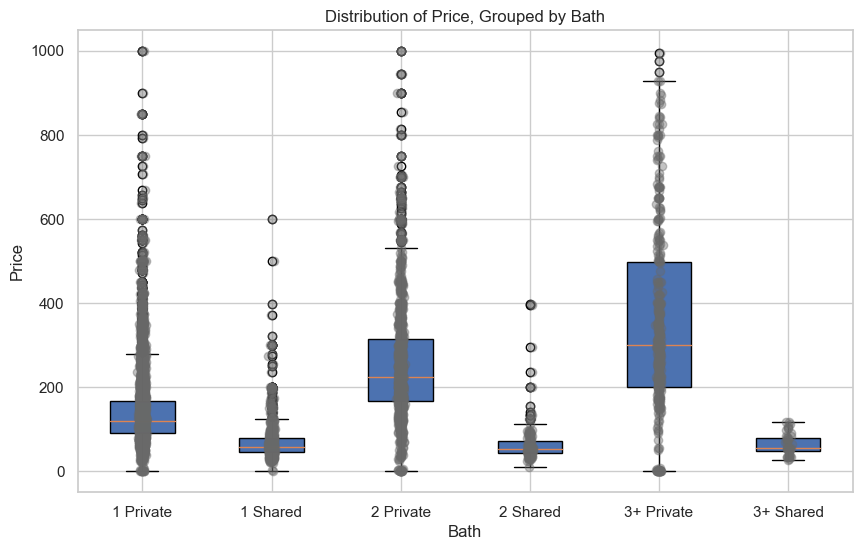

In [26]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
grouped_price_bath = price_bath_df.groupby('bath')
price_data = [grouped_price_bath.get_group(bath)['price'] for bath in grouped_price_bath.groups]

patch = axes.boxplot(price_data, labels=grouped_price_bath.groups.keys(), patch_artist=True, zorder=1)

for i, bath in enumerate(grouped_price_bath.groups.keys()):
    subdata = grouped_price_bath.get_group(bath)['price']
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

axes.set_xlabel('Bath')
axes.set_ylabel('Price')
axes.set_title('Distribution of Price, Grouped by Bath')
plt.show()
plt.close()

For listings with private bathrooms, the prices tend to increase with more bathrooms. Listings that have shared bathrooms appear to have the same values, regardless of how many shared baths are available.

### Listing Price vs. Neighborhood Group

To compare the listing price to the neighborhood group, the IQR needs to be calculated for each of the 39 neighborhood groupings.

In [27]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, CAST(REPLACE(price, '$', '') AS FLOAT), neighbourhood_cleansed FROM listings'''

cur.execute(query)
con.commit()

nbh_price = cur.fetchall()

con.close()

In [28]:
listing_id = []
price = []
nbhd = []

for pb in nbh_price:
    listing_id.append(pb[0])
    price.append(pb[1])
    nbhd.append(pb[2])
    
nbhd_df = pd.DataFrame({'listing_id': listing_id,
                             'price': price,
                             'nbhd': nbhd})


nbhd_grouped = nbhd_df.groupby('nbhd')
nbhd_grouped = nbhd_grouped['price'].describe()
nbhd_grouped= nbhd_grouped.sort_values('count', ascending=False)

print(nbhd_grouped)

                                                    count        mean  \
nbhd                                                                    
Capitol Hill, Lincoln Park                          561.0  168.040998   
Union Station, Stanton Park, Kingman Park           550.0  173.098182   
Columbia Heights, Mt. Pleasant, Pleasant Plains...  456.0  142.616228   
Dupont Circle, Connecticut Avenue/K Street          450.0  196.837778   
Shaw, Logan Circle                                  395.0  183.281013   
Edgewood, Bloomingdale, Truxton Circle, Eckington   386.0  149.025907   
Georgetown, Burleith/Hillandale                     320.0  186.587500   
Brightwood Park, Crestwood, Petworth                316.0  126.088608   
Downtown, Chinatown, Penn Quarters, Mount Verno...  254.0  236.893701   
Howard University, Le Droit Park, Cardozo/Shaw      226.0  164.734513   
West End, Foggy Bottom, GWU                         225.0  190.977778   
Ivy City, Arboretum, Trinidad, Carver Langston     

The IQR differs between the bathroom types available in the listings. AirBnB listings with shared bathrooms have similar nightly prices, with median values ranging from 52-58 USD per night. For listings that have private bathrooms, there is a significant difference in the meidan values. The median nightly cost of an AirBnB listing with 1 private bathroom is 120 USD per night. For listings with two private bathrooms, the nightly cost jumps to 225 USD. The median for listings with three or more private bathrooms is 300 USD per night. 

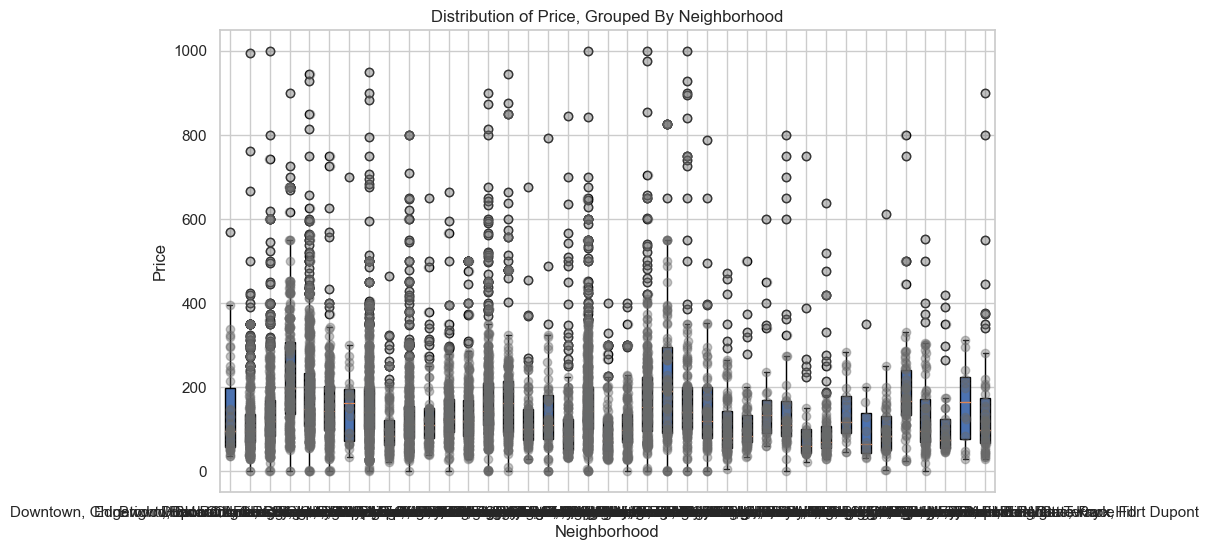

In [29]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

labels = pd.unique(nbhd_df['nbhd'].values)
grouped_data = [nbhd_df["price"].loc[nbhd_df['nbhd'] == k] for k in labels]
patch = axes.boxplot(grouped_data, labels=labels, patch_artist=True, zorder=1)

for i, k in enumerate(labels):
    subdata = nbhd_df["price"].loc[nbhd_df['nbhd'] == k]
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

axes.set_xlabel("Neighborhood")
axes.set_ylabel("Price")
axes.set_title("Distribution of Price, Grouped By Neighborhood")
plt.show()
plt.close()


Some neighborhoods tend to have higher median AirBnb Listing prices. Limiting the comparison to the neighborhoods that have at least 300 AirBnB listings:

In [30]:
nbhd_grouped = nbhd_grouped[nbhd_grouped['count']>300]
print(nbhd_grouped)

                                                    count        mean  \
nbhd                                                                    
Capitol Hill, Lincoln Park                          561.0  168.040998   
Union Station, Stanton Park, Kingman Park           550.0  173.098182   
Columbia Heights, Mt. Pleasant, Pleasant Plains...  456.0  142.616228   
Dupont Circle, Connecticut Avenue/K Street          450.0  196.837778   
Shaw, Logan Circle                                  395.0  183.281013   
Edgewood, Bloomingdale, Truxton Circle, Eckington   386.0  149.025907   
Georgetown, Burleith/Hillandale                     320.0  186.587500   
Brightwood Park, Crestwood, Petworth                316.0  126.088608   

                                                           std  min     25%  \
nbhd                                                                          
Capitol Hill, Lincoln Park                          121.826619  1.0  100.00   
Union Station, Stanton Park, Kin

The "Brightwood Park, Crestwood, Petworth" neighborhoods appear to have lower nightly costs of AirbnB listings. In contrast, the "Georgetown, Burleith/Hillandale" area appears to have the highest nightly costs for AirBnbs.

In [31]:
nbhd_groups = nbhd_grouped.index

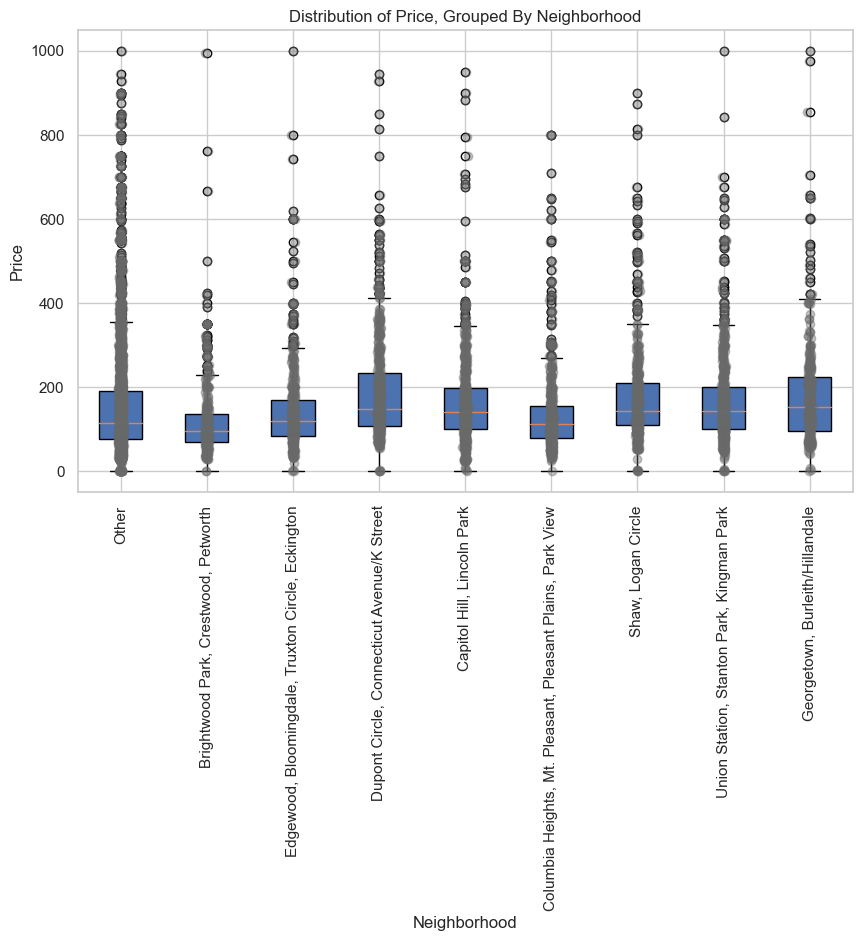

In [33]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

n_list = nbhd_grouped.index.unique()
nbhd_df.loc[~nbhd_df['nbhd'].isin(nbhd_groups), 'nbhd'] = 'Other'

labels = pd.unique(nbhd_df['nbhd'].values)
grouped_data = [nbhd_df["price"].loc[nbhd_df['nbhd'] == k] for k in labels]
patch = axes.boxplot(grouped_data, labels=labels, patch_artist=True, zorder=1)

for i, k in enumerate(labels):
    subdata = nbhd_df["price"].loc[nbhd_df['nbhd'] == k]
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

axes.set_xlabel("Neighborhood")
axes.set_ylabel("Price")
axes.set_title("Distribution of Price, Grouped By Neighborhood")
axes.set_xticklabels(labels, rotation=90)
plt.show()
plt.close()

The IQR of the pricing by neighborhood suggests that there is not a massive difference in prices of AirBnb listings depending on neighborhood. It does appear that the "Brightwood Park, Crestwood, Petworth" neighborhoods have an overall lower nightly cost.

### Price vs. Superhost Status

Around 30% of the AirBnB listings have hosts who also possess the superhost status. This status is advertised as AirBnb as being a factor in providing hosts with more success in bookings. This could mean that the hosts are able to list properties at a higher price.

In [34]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT id, CAST(REPLACE(price, '$', '') AS FLOAT), host_is_superhost
FROM listings;
'''

cur.execute(query)
con.commit()

super_price = cur.fetchall()

con.close()

In [35]:
listing_id = []
superhost = []
price = []

for pb in super_price:
    listing_id.append(pb[0])
    price.append(pb[1])
    if pb[2] == '':
        superhost.append('f')
    else:
        superhost.append(pb[2])
super_df = pd.DataFrame({'listing_id': listing_id,
                             'price': price,
                             'superhost': superhost})

super_df['superhost'] = super_df['superhost'].replace({'t': 'Superhost',
                                                    'f': 'Not Superhost'})

grouped_super = super_df.groupby('superhost')
grouped_super = grouped_super['price'].describe()

t = tabulate(grouped_super, 
             headers=('Is Superhost?', 'Count', 'Mean', 'Stdev', 'Min', '25%', '50%', '75%', 'Max'),
            tablefmt='fancy_grid')
print(t)
print('\n')

╒═════════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│ Is Superhost?   │   Count │    Mean │   Stdev │   Min │   25% │   50% │   75% │   Max │
╞═════════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ Not Superhost   │    4501 │ 159.449 │ 128.136 │     0 │    80 │   122 │   199 │   999 │
├─────────────────┼─────────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┤
│ Superhost       │    1972 │ 164.384 │ 124.402 │     1 │    93 │   129 │   189 │   950 │
╘═════════════════╧═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╛




The IQR values for superhosts and regular hosts are similar, with some minor variations. There does not to appear a significant difference between the price of a listing and the host's "superhost" status.

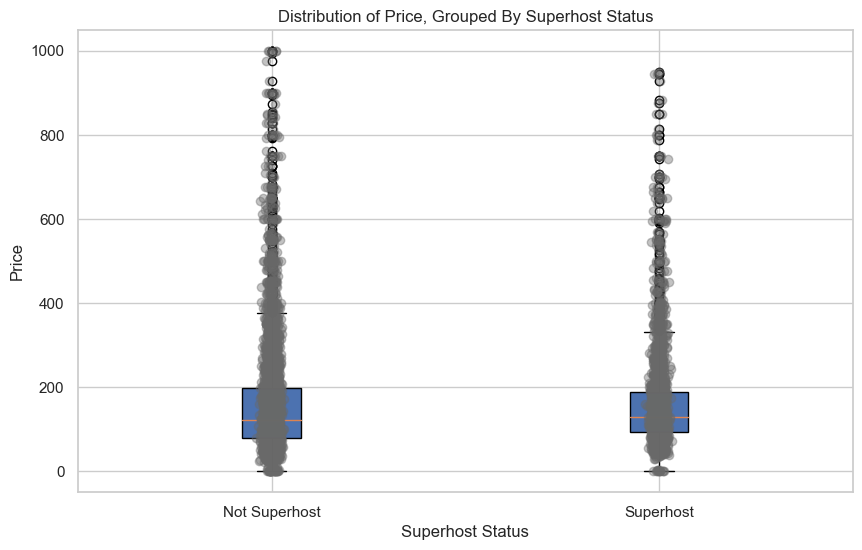

In [36]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

n_list = grouped_super.index.unique()
super_df = super_df[super_df['superhost'].isin(n_list)]

labels = pd.unique(super_df['superhost'].values)
grouped_data = [super_df["price"].loc[super_df['superhost'] == k] for k in labels]
patch = axes.boxplot(grouped_data, labels=labels, patch_artist=True, zorder=1)

for i, k in enumerate(labels):
    subdata = super_df["price"].loc[super_df['superhost'] == k]
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

axes.set_xlabel("Superhost Status")
axes.set_ylabel("Price")
axes.set_title("Distribution of Price, Grouped By Superhost Status")
plt.show()
plt.close()

The AirBnB listing cost distribution appears to be similar, regardless of whether or not the host is a superhost. 

# Backup

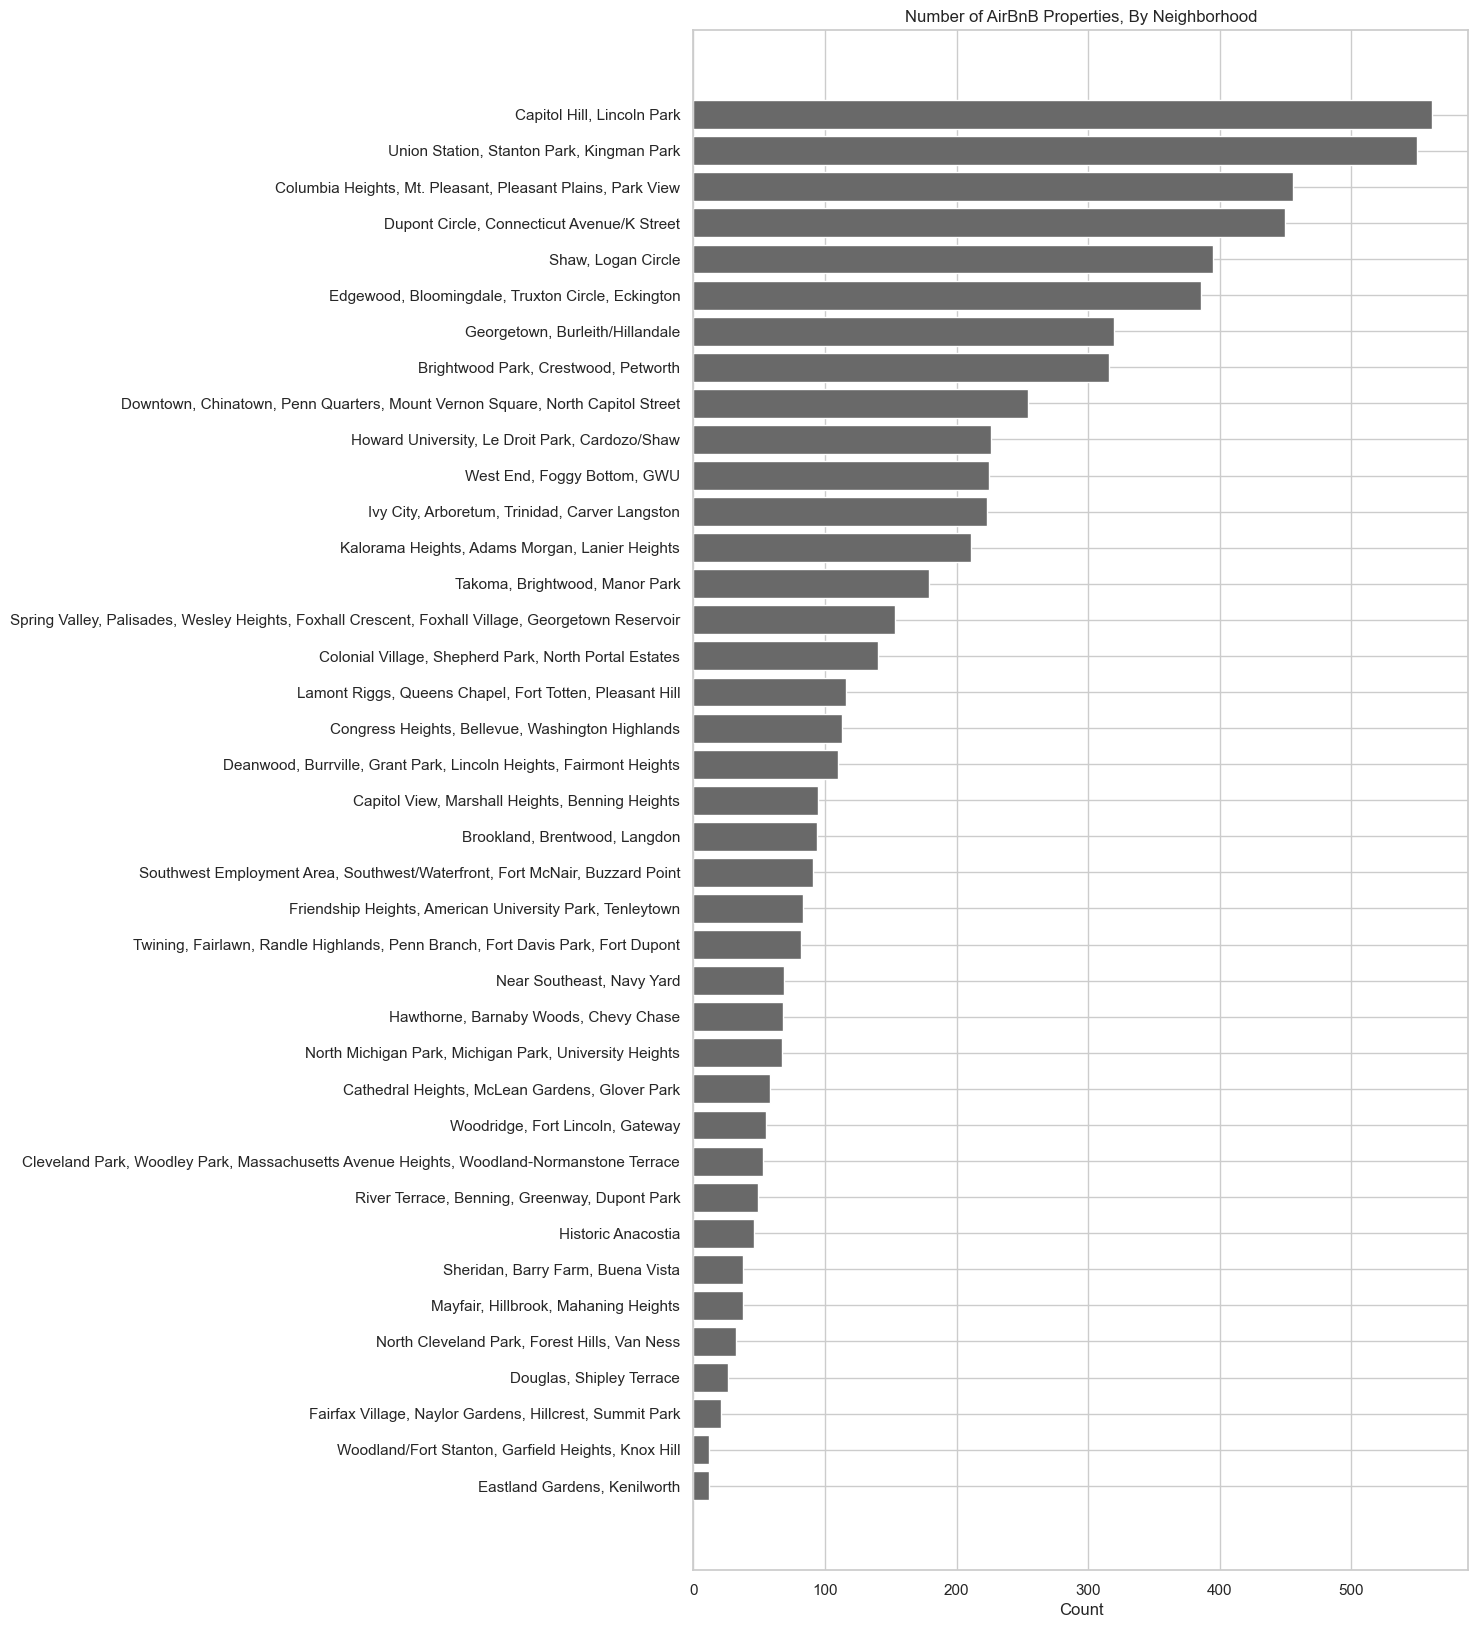

In [37]:
figure = plt.figure(figsize=(10, 20)) # first element is width, second is height.

y_pos = np.arange(len(n_df.nbhd))
axes = figure.add_subplot(1, 1, 1)

axes.barh(y_pos, n_df.n_count, color="dimgray")
axes.set_title( "Number of AirBnB Properties, By Neighborhood")
axes.set_yticks(y_pos)
axes.set_yticklabels(n_df.nbhd)
axes.invert_yaxis()
axes.set_xlabel('Count')


plt.show()
plt.close()

### Secondary data source

For the secondary datasource, any properties with a tax-assessed value of greater than 5 million USD, or less than 50 thousand USD, will be excluded. The tax-assessed value can be considered to be similar to the nightly cost of an AirBnB. Comparing the tax-assessed value by neighborhood could indicate which neighborhoods of DC are more expensive, and may also contain more expensive AirBnb listings.

In [44]:
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT * FROM property_info
WHERE PROPTYPE LIKE '%Residential-Single Family%'
AND ASSESSMENT < 5000000
AND ASSESSMENT > 49999;'''

cur.execute(query)
con.commit()

assess_price = cur.fetchall()

con.close()

In [49]:
nbhd_tx = []
val_tx = []
for a in assess_price:
    nbhd_tx.append(a[1])
    val_tx.append(a[2])

tax_df = pd.DataFrame({'nbhd': nbhd_tx,
                      'val': val_tx})

tax_df.loc[~tax_df['nbhd'].isin(nbhd_groups), 'nbhd'] = 'Other'

tax_grouped = tax_df.groupby('nbhd')
tax_grouped.val.describe()

,count,mean,std,min,25%,50%,75%,max
nbhd,,,,,,,,
"Brightwood Park, Crestwood, Petworth",11809.0,7.820917e+05,240397.373721,419880.0,636230.0,711210.0,876200.0,3998750.0
"Capitol Hill, Lincoln Park",11567.0,9.385037e+05,294983.632984,132740.0,741525.0,881250.0,1067330.0,4395070.0
"Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View",5219.0,8.776364e+05,235918.519813,329250.0,716240.0,811770.0,999530.0,2959080.0
"Dupont Circle, Connecticut Avenue/K Street",2863.0,1.048928e+06,398255.548388,273130.0,778670.0,938540.0,1204625.0,4407460.0
"Edgewood, Bloomingdale, Truxton Circle, Eckington",1198.0,7.924176e+05,161480.808410,487320.0,670882.5,770235.0,872272.5,1659790.0
"Georgetown, Burleith/Hillandale",3048.0,1.699229e+06,822991.940315,422860.0,1104682.5,1493790.0,1980227.5,4987630.0
Other,55638.0,8.053877e+05,598000.163584,118428.0,411590.0,594590.0,1039167.5,4994380.0
"Union Station, Stanton Park, Kingman Park",1453.0,3.818089e+05,120299.236764,216580.0,312700.0,347410.0,435950.0,3338680.0


"Georgetown, Burleith/Hillandale" have properties with the highest tax-assessed values. The neighborhood grouping with the lowest tax-assessed property values is the "Union Station, Stanton Park, and Kingman Park" neighborhoods. 

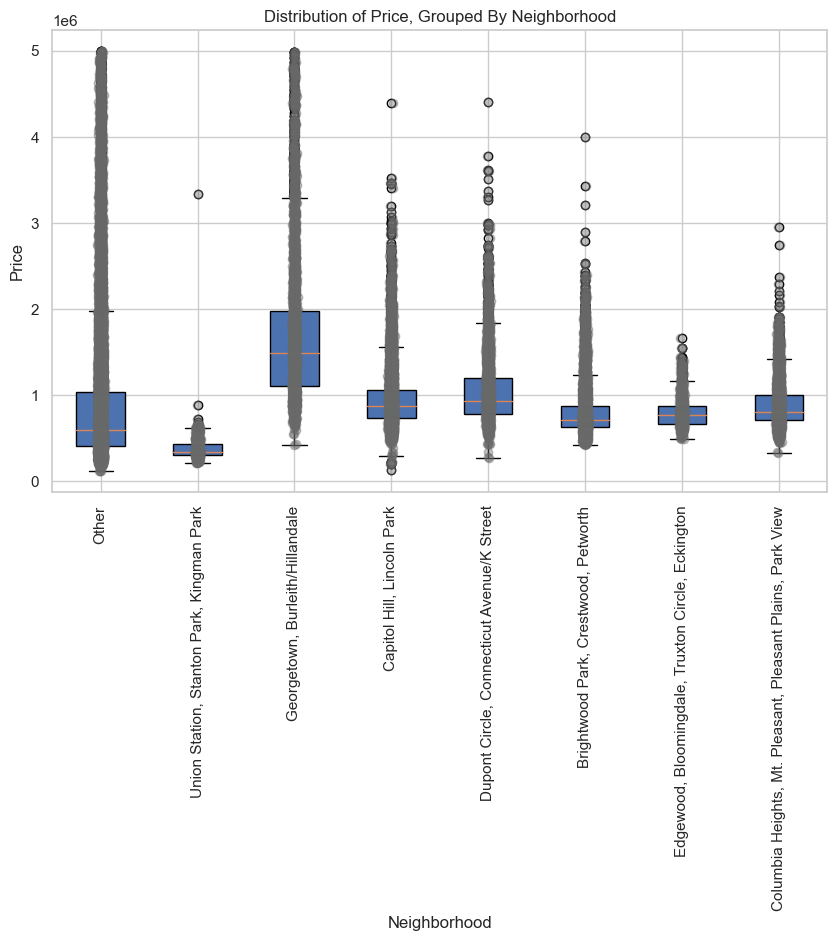

In [43]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)

n_list = tax_grouped.nbhd.unique()

labels = pd.unique(tax_df['nbhd'].values)
grouped_data = [tax_df["val"].loc[tax_df['nbhd'] == k] for k in labels]
patch = axes.boxplot(grouped_data, labels=labels, patch_artist=True, zorder=1)

for i, k in enumerate(labels):
    subdata = tax_df["val"].loc[tax_df['nbhd'] == k]
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

axes.set_xlabel("Neighborhood")
axes.set_ylabel("Price")
axes.set_title("Distribution of Price, Grouped By Neighborhood")
axes.set_xticklabels(labels, rotation=90)
plt.show()
plt.close()

The IQR of the "Georgetown, Burleith/Hillandale" grouping is higher than all others. "Union Station, Stanton Park, Kingman Park" has the residential homes with the lowest tax-assessed property values. The other neighborhood groups are similar in their tax-assessed distribution.